# Homework 3

## 2. Density Estimation: Psychological Experiments 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.neighbors import KernelDensity
from matplotlib import cm
import scipy.stats as st

In [3]:
data = pd.read_csv("data/n90pol.csv")
# acc_data = np.array(data['acc']).reshape(-1, 1)
# amygdala_data = np.array(data['amygdala']).reshape(-1, 1)

acc_data = np.array(data['acc'])
amygdala_data = np.array(data['amygdala'])

### Part A
(a) (5 points) Form the 1-dimensional histogram and KDE to estimate the distributions of amygdala and acc, respectively. For this question, you can ignore the variable orienta- tion. Decide on a suitable number of bins so you can see the shape of the distribution clearly. Set an appropriate kernel bandwidth h > 0.  

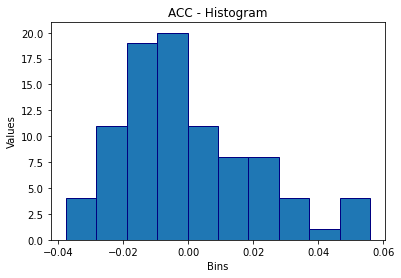

In [4]:
acc_hist = plt.hist(acc_data, bins=10, edgecolor = 'navy')
plt.title('ACC - Histogram') 
plt.xlabel('Bins') 
plt.ylabel('Values') 
plt.savefig('Q2_Output/PartA_acc_hist.jpg')

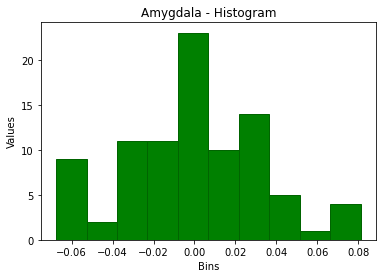

In [5]:
amygdala_hist = plt.hist(amygdala_data , bins=10, facecolor = 'green', edgecolor = 'darkgreen')
plt.title('Amygdala - Histogram') 
plt.xlabel('Bins') 
plt.ylabel('Values') 
plt.savefig('Q2_Output/PartA_amygdala_hist.jpg')

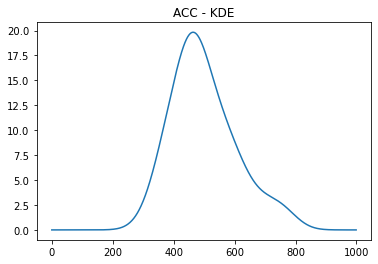

In [57]:
# https://scikit-learn.org/stable/auto_examples/neighbors/plot_kde_1d.html
X_plot = np.linspace(-0.1, 0.1, 1000)[:, np.newaxis]

kde = KernelDensity(kernel="gaussian", bandwidth=0.01)

acc_kde = kde.fit(acc_data.reshape(-1, 1))
log_dens_acc = kde.score_samples(X_plot)
plt.plot(np.exp(log_dens_acc))

plt.title('ACC - KDE') 
plt.savefig('Q2_Output/PartA_acc_kde.jpg')

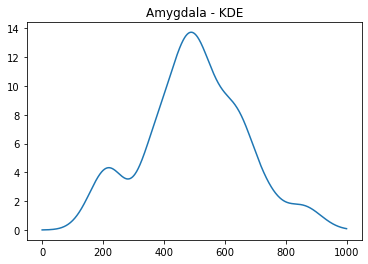

In [58]:
# https://scikit-learn.org/stable/auto_examples/neighbors/plot_kde_1d.html
X_plot = np.linspace(-0.1, 0.1, 1000)[:, np.newaxis]

kde1 = KernelDensity(kernel="gaussian", bandwidth=0.01)

amygdala_kde = kde1.fit(amygdala_data.reshape(-1, 1))
log_dens_amygdala = kde1.score_samples(X_plot)
plt.plot(np.exp(log_dens_amygdala))

plt.title('Amygdala - KDE') 
plt.savefig('Q2_Output/PartA_amygdala_kde.jpg')

### Part B
Form 2-dimensional histogram for the pairs of variables (amygdala, acc). Decide on a suitable number of bins so you can see the shape of the distribution clearly.

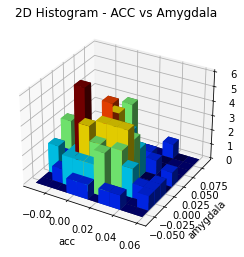

In [8]:
# https://stackoverflow.com/questions/8437788/how-to-correctly-generate-a-3d-histogram-using-numpy-or-matplotlib-built-in-func
x = acc_data.reshape(len(acc_data))  #turn x,y data into numpy arrays
y = amygdala_data.reshape(len(amygdala_data)) 

fig = plt.figure()          #create a canvas, tell matplotlib it's 3d
ax = fig.add_subplot(111, projection='3d')

#make histogram stuff - set bins - I choose 20x20 because I have a lot of data
hist, xedges, yedges = np.histogram2d(x, y, bins=(10,10))
xpos, ypos = np.meshgrid(xedges[:-1]+xedges[1:], yedges[:-1]+yedges[1:])

xpos = xpos.flatten()/2.
ypos = ypos.flatten()/2.
zpos = np.zeros_like (xpos)

dx = xedges [1] - xedges [0]
dy = yedges [1] - yedges [0]
dz = hist.flatten()

cmap = cm.get_cmap('jet') # Get desired colormap - you can change this!
max_height = np.max(dz)   # get range of colorbars so we can normalize
min_height = np.min(dz)
# scale each z to [0,1], and get their rgb values
rgba = [cmap((k-min_height)/max_height) for k in dz] 

ax.bar3d(xpos, ypos, zpos, dx, dy, dz, color=rgba, zsort='average')
plt.title("2D Histogram - ACC vs Amygdala")
plt.xlabel("acc")
plt.ylabel("amygdala")
plt.savefig('Q2_Output/PartB_2DHist.jpg')
plt.show()

### Part C

(c) (10 points) Use kernel-density-estimation (KDE) to estimate the 2-dimensional density function of (amygdala, acc) (this means for this question, you can ignore the variable orientation). Set an appropriate kernel bandwidth h > 0.
Please show the two-dimensional KDE (e.g., two-dimensional heat-map, two-dimensional contour plot, etc.)
Please explain what you have observed: is the distribution unimodal or bi-modal? Are there any outliers?
Please explain based on the results, can you infer that the two variables (amygdala, acc) are likely to be independent or not? 

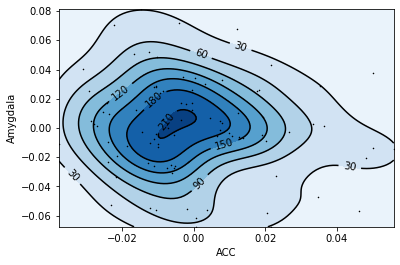

In [9]:
# Plot 2D KDe
# https://stackoverflow.com/questions/30145957/plotting-2d-kernel-density-estimation-with-python

x = acc_data.reshape(len(acc_data)) 
y = amygdala_data.reshape(len(amygdala_data)) 

xmin, xmax = min(x), max(x)
ymin, ymax = min(y), max(y)

# Peform the kernel density estimate
xx, yy = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
positions = np.vstack([xx.ravel(), yy.ravel()])
values = np.vstack([x, y])
kernel = st.gaussian_kde(values)
f = np.reshape(kernel(positions).T, xx.shape)

fig = plt.figure()
ax = fig.gca()
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)

# Contourf plot
cfset = ax.contourf(xx, yy, f, cmap='Blues')
## Or kernel density estimate plot instead of the contourf plot
# ax.imshow(np.rot90(f), cmap='Blues', extent=[xmin, xmax, ymin, ymax])

# Contour plot
cset = ax.contour(xx, yy, f, colors='k')

# Plot points
ax.plot(x,y, '*', markersize = 1, color = 'black')

# Label plot
ax.clabel(cset, inline=1, fontsize=10)
ax.set_xlabel('ACC')
ax.set_ylabel('Amygdala')

plt.savefig('Q2_Output/PartC_2DKDE.jpg')
plt.show()

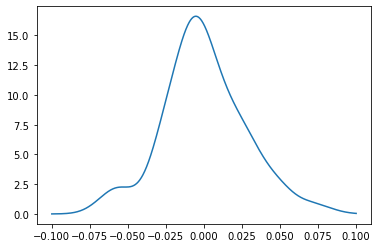

In [77]:
# Calculate joint distribution
X_plot = np.linspace(-0.1, 0.1, 1000)[:, np.newaxis]

joint_values = np.vstack([amygdala_data.reshape(-1, 1), acc_data.reshape(-1, 1)])
kde_joint =  KernelDensity(kernel="gaussian", bandwidth=0.01).fit(joint_values)

log_dens_joint = kde_joint.score_samples(X_plot)
plt.plot(np.exp(log_dens_joint))
plt.savefig('Q2_Output/PartC_JointDistribution.jpg')

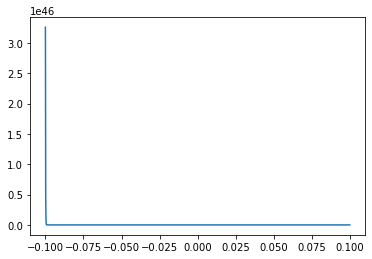

In [76]:
# Independence Check: p(acc, amy) = p(acc)*p(amy)
X_plot = np.linspace(-0.1, 0.1, 1000)[:, np.newaxis]

marginal_dist = log_dens_acc*log_dens_amygdala
plt.plot(np.exp(marginal_dist))
plt.savefig('Q2_Output/PartC_ProductOfMarginal.jpg')

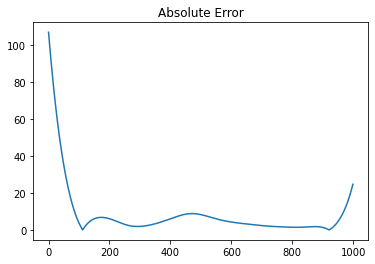

In [78]:
# Calculate Error
abs_error = abs(marginal_dist - np.exp(log_dens_joint))

plt.plot(abs_error)
plt.title('Absolute Error')
plt.savefig('Q2_Output/PartC_Error.jpg')

### Part D
(d) (10 points) We will consider the variable orientation and consider conditional distri- butions. Please plot the estimated conditional distribution of amygdala conditioning on political orientation: p(amygdala|orientation = c), c = 2, . . . , 5, using KDE. Set an appropriate kernel bandwidth h > 0. Do the same for the volume of the acc: plot p(acc|orientation = c), c = 2, . . . , 5 using KDE. (Note that the conditional distribution
2
 
can be understood as fitting a distribution for the data with the same orientation. Thus you should plot 8 one-dimensional distribution functions in total for this question.)
Now please explain based on the results, can you infer that the conditional distribution of amygdala and acc, respectively, are different from c = 2,...,5? This is a type of scientific question one could infer from the data: Whether or not there is a difference between brain structure and political view.

Now please also fill out the conditional sample mean for the two variables: c=2 c=3 c=4 c=5
amygdala acc
Remark: As you can see this exercise, you can extract so much more information from density estimation than simple summary statistics (e.g., the sample mean) in terms of explorable data analysis.

In [88]:
X_plot = np.linspace(-0.1, 0.1, 1000)[:, np.newaxis]

for i in range(2,6):
    print("Orientation: " + str(i))
    
    orient = data[data['orientation'] == i]
    acc = np.array(orient['acc']).reshape(-1, 1)
    amygdala = np.array(orient['amygdala']).reshape(-1, 1)
    
    kde_acc = KernelDensity(kernel="gaussian", bandwidth=0.01).fit(acc)
    kde_amy = KernelDensity(kernel="gaussian", bandwidth=0.01).fit(amygdala)

    fig, ax = plt.subplots(figsize=(6, 4))
    
    log_dens_acc = kde_acc.score_samples(X_plot)
    plt.plot(np.exp(log_dens_acc))
    plt.savefig('Q2_Output/PartD_acc_c' + str(i) + '.jpg')
    plt.clf()
    
    log_dens_amy = kde_amy.score_samples(X_plot)
    plt.plot(np.exp(log_dens_amy))
    plt.savefig('Q2_Output/PartD_amy_c' + str(i) + '.jpg')
    plt.clf()
        
    acc_mean = np.mean(acc)
    amy_mean = np.mean(amygdala)
    
    print("acc_mean = " + str(round(acc_mean,2)))
    print("amy_mean = " + str(round(amy_mean,2)))

Orientation: 2
acc_mean = -0.01
amy_mean = 0.02
Orientation: 3
acc_mean = 0.0
amy_mean = 0.0
Orientation: 4
acc_mean = 0.0
amy_mean = -0.0
Orientation: 5
acc_mean = 0.01
amy_mean = -0.01


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

### Part E

(e) (10 points) Again we will consider the variable orientation. We will estimate the con- ditional joint distribution of the volume of the amygdala and acc, conditioning on a function of political orientation: p(amygdala, acc|orientation = c), c = 2, . . . , 5. You will use two-dimensional KDE to achieve the goal; et an appropriate kernel band- width h > 0. Please show the two-dimensional KDE (e.g., two-dimensional heat-map, two-dimensional contour plot, etc.).
Please explain based on the results, can you infer that the conditional distribution of two variables (amygdala, acc) are different from c = 2, . . . , 5? This is a type of scientific question one could infer from the data: Whether or not there is a difference between brain structure and political view.

In [89]:
X_plot = np.linspace(-0.1, 0.1, 1000)[:, np.newaxis]

for i in range(2,6):
    print("Orientation: " + str(i))
    
    orient = data[data['orientation'] == i]
    acc = np.array(orient['acc']).reshape(-1, 1)
    amygdala = np.array(orient['amygdala']).reshape(-1, 1)
    
    kde_data = np.vstack([acc, amygdala])
    kde = KernelDensity(kernel="gaussian", bandwidth=0.01).fit(kde_data)
    
    fig, ax = plt.subplots(figsize=(6, 4))

    log_dens_joint = kde.score_samples(X_plot)
    plt.plot(np.exp(log_dens_joint))
    plt.savefig('Q2_Output/PartE_joint_c' + str(i) + '.jpg')
    plt.clf()
    

Orientation: 2
Orientation: 3
Orientation: 4
Orientation: 5


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

## 3. Implementing EM for MNIST Dataset

### Part A
Write down detailed expression of the E-step and M-step in the EM algo- rithm. (hint: when computing τki, you can drop the (2π)n/2 factor from the numerator and denominator expression, since it will be canceled out; this can help avoid some numerical issues in computation).

Note: It is not sufficient to use N (...) to represent the multivariate Gaussian, you must fully write out any p.d.f. expressions. 

**FILL THIS IN**

In [90]:
import scipy.io as spio
from scipy.stats import multivariate_normal as mvn
import seaborn as sns
from sklearn.cluster import KMeans
from scipy import ndimage

First use PCA to reduce the dimensionality of the data before applying to EM. We will put all “6” and “2” digits together, to project the original data into 4-dimensional vectors.

In [91]:
# Import Data
images = spio.loadmat('data/data.mat',squeeze_me=True)['data'].T # each image is a row
labels = spio.loadmat('data/label.mat',squeeze_me=True)['trueLabel']
m,n = images.shape

### Part B
(b) (15 points) Implement EM algorithm yourself. Use the following initialization 􏰅 initialization for mean: random Gaussian vector with zero mean
􏰅 initialization for covariance: generate two Gaussian random matrix of size n-by- n: S1 and S2, and initialize the covariance matrix for the two components are Σ1 = S1S1T + In, and Σ2 = S2S2T + In, where In is an identity matrix of size n-by-n.
Plot the log-likelihood function vs the number of iterations to show your algorithm is converging.  

In [92]:
# Code from Module7_EM-gmm.py
C = np.matmul(images.T, images)/m

# pca the data
d = 4  # reduced dimension
V,Sig,_ = np.linalg.svd(C)
V = V[:, :d]

# project the data to the top 4 principal directions
pdata = np.dot(images,V)

-----iteration---  0


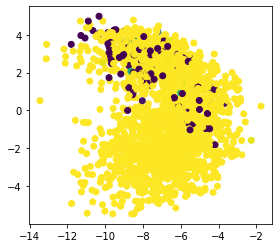

-----iteration---  1


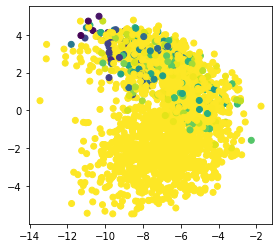

-----iteration---  2


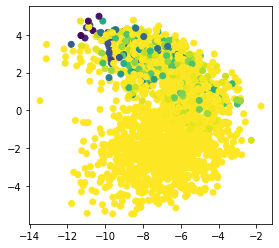

-----iteration---  3


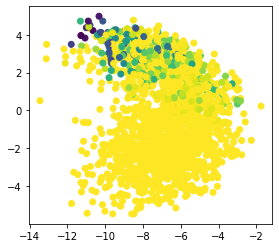

-----iteration---  4


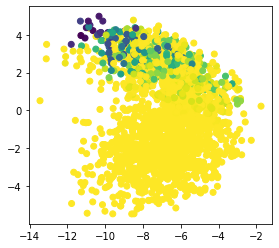

-----iteration---  5


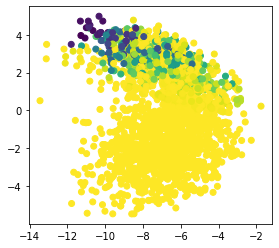

-----iteration---  6


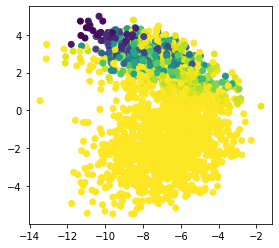

-----iteration---  7


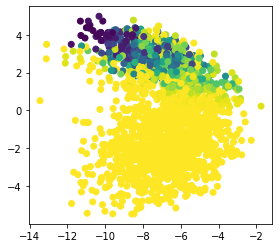

-----iteration---  8


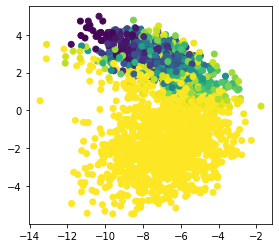

-----iteration---  9


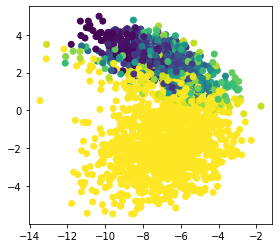

-----iteration---  10


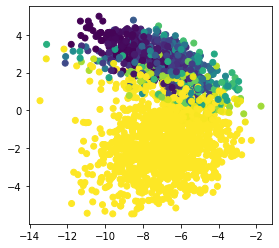

-----iteration---  11


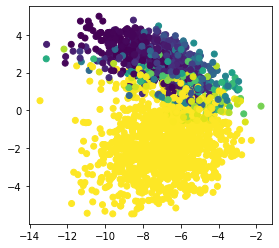

-----iteration---  12


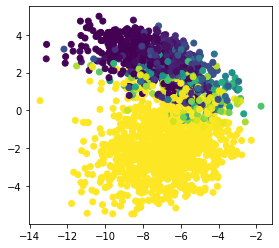

-----iteration---  13


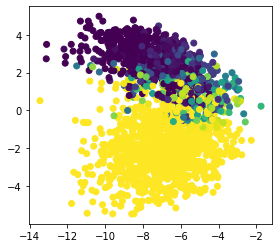

-----iteration---  14


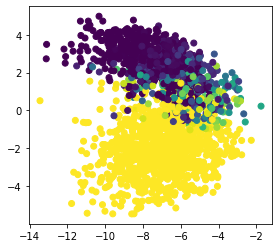

-----iteration---  15


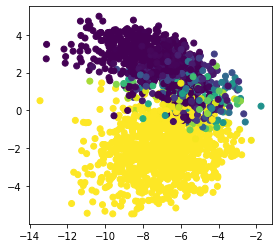

-----iteration---  16


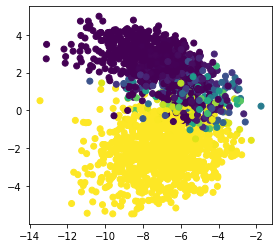

-----iteration---  17


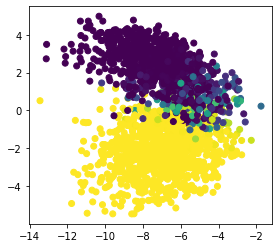

-----iteration---  18


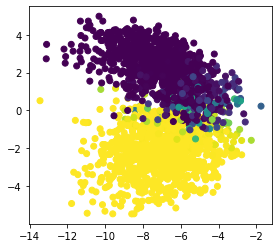

-----iteration---  19


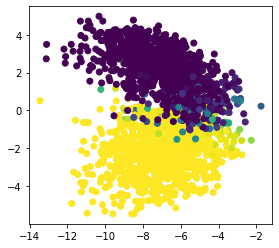

-----iteration---  20


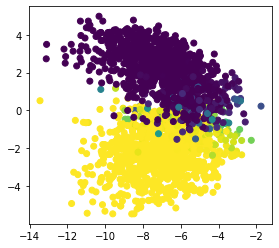

-----iteration---  21


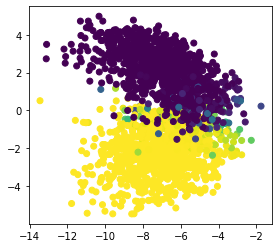

-----iteration---  22


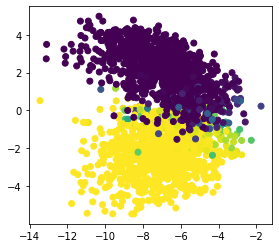

-----iteration---  23


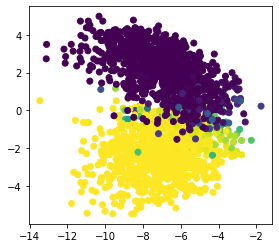

-----iteration---  24


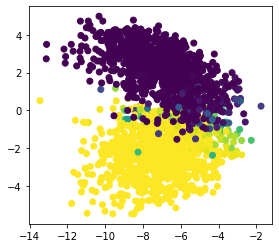

-----iteration---  25


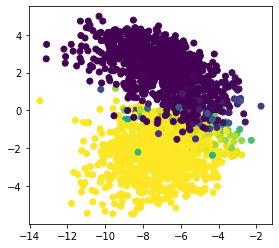

-----iteration---  26


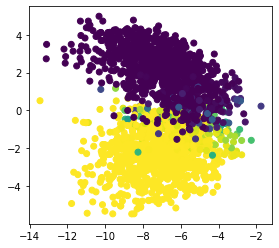

-----iteration---  27


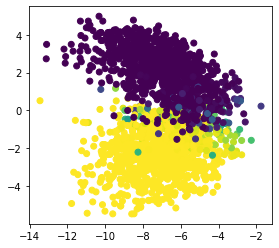

training coverged


In [93]:
# Code from Module7_EM-gmm.py

# Initialization
seed = 4624
np.random.seed(seed)
K = 2

# initialize prior
pi = np.random.random(K)
pi = pi/np.sum(pi)

# Mean
mu = np.random.randn(K,d)
mu_old = mu.copy()

# Covariance
sigma = []
for ii in range(K):
    # to ensure the covariance psd
    # np.random.seed(seed)
    dummy = np.random.randn(d, d)
    sigma.append(dummy@dummy.T)
    
# initialize the posterior
tau = np.full((m, K), fill_value=0.)

## EM Algorithm

# Initialization
maxIter= 100
tol = 1e-3

# Metrics for log-likelihood
log_likelihood = []
iter_count = []

plt.ion()
    
for ii in range(100):
# for ii in range(20):

    # E-step    
    for kk in range(K):
        tau[:, kk] = pi[kk] * mvn.pdf(pdata, mu[kk], sigma[kk])
        
    # normalize tau
    sum_tau = np.sum(tau, axis=1)
    sum_tau.shape = (m,1)    
    tau = np.divide(tau, np.tile(sum_tau, (1, K)))
    
    # M-step
    for kk in range(K):
        # update prior
        pi[kk] = np.sum(tau[:, kk])/m
        
        # update component mean
        mu[kk] = pdata.T @ tau[:,kk] / np.sum(tau[:,kk], axis = 0)
        
        # update cov matrix
        dummy = pdata - np.tile(mu[kk], (m,1)) # X-mu
        sigma[kk] = dummy.T @ np.diag(tau[:,kk]) @ dummy / np.sum(tau[:,kk], axis = 0)
        
        
    # Metrics for graph
    log_likelihood.append(np.sum(np.log(sum_tau)))
    iter_count.append(ii)
        
    print('-----iteration--- ',ii)    
    plt.scatter(pdata[:,0], pdata[:,1], c = tau[:,0])
    plt.axis('scaled')
    plt.draw()
    plt.pause(0.1)
    
    
    if np.linalg.norm(mu-mu_old) < tol:
        print('training coverged')
        break
    mu_old = mu.copy()
    
    if ii==99:
        print('max iteration reached')
        break
        

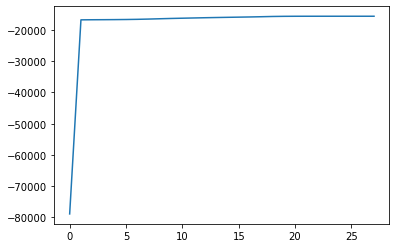

In [95]:
plt.plot(iter_count,log_likelihood)
plt.savefig('Q3_Output/PartB_Loglikelihood.jpg')

### Part C

(5 points) Report the fitted GMM model when EM terminates. For the mean of each component, map these back to the original space and reformat the vectors to make them into 28-by-28 matrices and show images. Ideally, you should be able to see these means correspond to “average” images. You can report the two 4-by-4 covariance matrices by visualizing their intensities (e.g., using a gray scaled image or heat map).

In [96]:
# Weights
print(pi)

# Mean
print(mu)

[0.48677765 0.51322235]
[[-6.99963799 -2.19816819 -0.08330306  0.31334553]
 [-6.86394966  1.98235776  0.07001079 -0.47662696]]


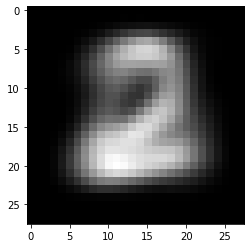

In [97]:
# Reconstruct model mean vector
model_mean = V@np.diag(np.sqrt(Sig[:d]))@mu[0]

# # Plot
image1 = (V@np.diag(np.sqrt(Sig[:d]))@mu[0]).reshape(28,28)
image1 = np.fliplr(image1)
image1 = ndimage.rotate(image1, 90, reshape=False)

plt.imshow(image1, cmap='gray')
plt.savefig('Q3_Output/PartC_Image1.jpg')

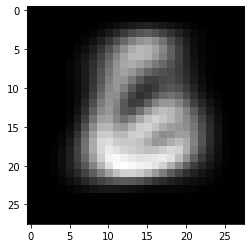

In [98]:
image2 = (V@np.diag(np.sqrt(Sig[:d]))@mu[1]).reshape(28,28)
image2 = np.fliplr(image2)
image2 = ndimage.rotate(image2, 90, reshape=False)
                
plt.imshow(image2, cmap='gray')
plt.savefig('Q3_Output/PartC_Image2.jpg')

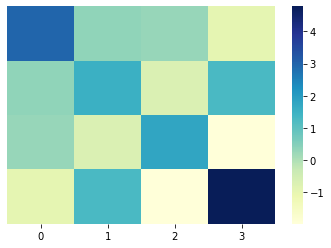

In [99]:
# Covariance
cov1 = sns.heatmap(sigma[0], cmap = 'YlGnBu', yticklabels=False)
fig = cov1.get_figure()
fig.savefig("Q3_Output/PartC_Cov1.jpg") 

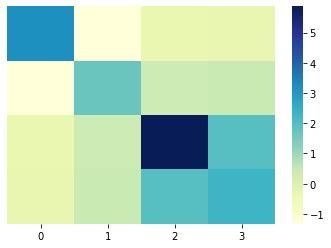

In [100]:
cov2 = sns.heatmap(sigma[1], cmap = 'YlGnBu', yticklabels=False)
fig = cov2.get_figure()
fig.savefig("Q3_Output/PartC_Cov2.jpg") 

### Part D
(d) (10 points) Use τki to infer the labels of the images, and compare with the true labels. Report the mis-classification rate for digits “2” and “6” respectively. Perform K-means clustering with K = 2 (you may call a package or use code from previous assignments). Find the mis-classification rate for digits “2” and “6” respectively, and compare with GMM. Which model achieves better performance overall?

In [101]:
# GMM Labels
em_labels = np.argmax(tau, axis = 1)

# Replace labels based on corresponding digit: 0 = 2, 1 = 6
em_labels[em_labels == 0] = 2
em_labels[em_labels == 1] = 6

em_mismatch = len(em_labels[em_labels != labels])/len(em_labels)
em_mismatch

0.03768844221105527

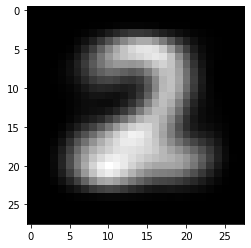

In [102]:
# Perform K Means
np.random.seed(seed)
kmeans = KMeans(n_clusters = 2).fit(images)
kmeans_labels = kmeans.labels_

kmeans_centers = kmeans.cluster_centers_

# Check which cluster is which so we can calculate mismatch
center_0 = kmeans_centers[0].reshape(28,28)
center_1 = kmeans_centers[1].reshape(28,28)

center_0 = np.fliplr(center_0)
center_0 = ndimage.rotate(center_0, 90, reshape=False)
plt.imshow(center_0, cmap='gray')

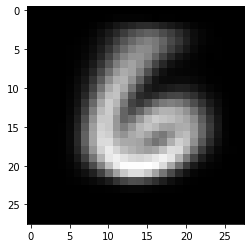

In [103]:
center_1 = np.fliplr(center_1)
center_1 = ndimage.rotate(center_1, 90, reshape=False)
plt.imshow(center_1, cmap='gray')

In [104]:
# Replace labels based on corresponding digit: 0 = 2, 1 = 6
kmeans_labels[kmeans_labels == 0] = 2
kmeans_labels[kmeans_labels == 1] = 6

In [105]:
kmeans_mismatch = len(kmeans_labels[kmeans_labels != labels])/len(kmeans_labels)
kmeans_mismatch

0.062311557788944726